### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### import dataset

In [2]:
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
copy_train_df = train_df.copy()

In [6]:
# get number of rows and columns
copy_train_df.shape

(891, 12)

In [7]:
copy_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
copy_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
copy_train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
copy_train_df['Age'].skew()

0.38910778230082704

the skew value is close to 0. So We can consider the age column is symmetrically distribute.

### Remove the unwanted columns

In [11]:
copy_train_df.drop(columns=['PassengerId'], inplace=True)

In [12]:
copy_train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Check numerical and categorical columns

In [13]:
# get numberical column list
numeric_columns = [feature for feature in copy_train_df.columns if copy_train_df[feature].dtype != 'object']
numeric_columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
# get categorical column list
categorical_columns = [feature for feature in copy_train_df.columns if copy_train_df[feature].dtype == 'object']
categorical_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### Check duplicate

In [15]:
# get duplicates and count of duplicates
duplicates = copy_train_df.duplicated()
copy_train_df[duplicates]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Check missing values

In [16]:
# get count of missing values in each column
copy_train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
copy_train_df[(copy_train_df['Age'].isnull())].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


### Handling Missing Values

In [18]:
# Using regression model to replace missing values of Age column
from sklearn.linear_model import LinearRegression

train_data = copy_train_df[copy_train_df['Age'].notna()]
test_data = copy_train_df[copy_train_df['Age'].isna()]

X_train = train_data[['Pclass', 'Sex', 'Fare', 'Embarked']]
y_train = train_data['Age']

X_test = test_data[['Pclass', 'Sex', 'Fare', 'Embarked']]

# convert categorical columns into numeric (e.g using pd.get_dummies)
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

model = LinearRegression()
model.fit(X_train, y_train)

predicted_ages = model.predict(X_test)

copy_train_df.loc[copy_train_df['Age'].isna(), 'Age'] = predicted_ages

In [19]:
# Using regression model to replace missing values of Cabin column
from sklearn.ensemble import RandomForestClassifier

copy_train_df['Cabin'] = copy_train_df['Cabin'].fillna('Unknown')

dummy_train_df = copy_train_df.copy()

dummy_train_df['CabinLetter'] = dummy_train_df['Cabin'].str[0]

dummy_train_df = pd.get_dummies(dummy_train_df, columns = ['CabinLetter', 'Sex', 'Embarked'], drop_first=True)

In [20]:
X_train_cabin = dummy_train_df[dummy_train_df['Cabin'] != 'Unknown'][['Pclass', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S','CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D','CabinLetter_E','CabinLetter_F','CabinLetter_G','CabinLetter_T','CabinLetter_U']]
y_train_cabin = dummy_train_df[dummy_train_df['Cabin'] != 'Unknown']['Cabin']

X_test_cabin = dummy_train_df[dummy_train_df['Cabin'] == 'Unknown'][['Pclass', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S','CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D','CabinLetter_E','CabinLetter_F','CabinLetter_G','CabinLetter_T','CabinLetter_U']]

cabin_model = RandomForestClassifier()
cabin_model.fit(X_train_cabin, y_train_cabin)

predicted_cabin = cabin_model.predict(X_test_cabin)

copy_train_df.loc[copy_train_df['Cabin'] == 'Unknown', 'Cabin'] = predicted_cabin

### Get details using independent variables

In [21]:
cabin_grouped = copy_train_df.groupby(['Cabin', 'Sex'])['Survived'].count()
for (cabin, gender), survived in cabin_grouped.items():
    if survived > 20:
        print(f"cabin: {cabin}, gender: {gender} and survived: {survived}")

cabin: A19, gender: male and survived: 21
cabin: D, gender: female and survived: 37
cabin: D, gender: male and survived: 51
cabin: D56, gender: male and survived: 58
cabin: E10, gender: male and survived: 159
cabin: E101, gender: female and survived: 49
cabin: E121, gender: female and survived: 51
cabin: E121, gender: male and survived: 65
cabin: F G73, gender: male and survived: 40
cabin: F38, gender: female and survived: 26
cabin: F38, gender: male and survived: 39
cabin: G6, gender: female and survived: 41


In [22]:
# Group by both 'Sex' and 'Survived' to get the count of survivors and non-survivors by gender
survival_gender_grouped = copy_train_df.groupby(['Sex', 'Survived']).size().reset_index(name = 'Count')

# Display the result
print(survival_gender_grouped)

      Sex  Survived  Count
0  female         0     81
1  female         1    233
2    male         0    468
3    male         1    109


In [23]:
age_grouped = copy_train_df.groupby('Age')['Survived'].count()
for age, survived in age_grouped.items():
    if age > 70:
        print(f"age: {age} and survived: {survived}")

age: 70.5 and survived: 1
age: 71.0 and survived: 2
age: 74.0 and survived: 1
age: 80.0 and survived: 1


In [24]:
age_wise_count = copy_train_df['Age'].value_counts().sort_values(ascending=False)
for i, (age, count) in enumerate(age_wise_count.items()):
        if i == 10:
                break
        print(f"age: {age} and count: {count}")

age: 24.0 and count: 30
age: 22.0 and count: 27
age: 18.0 and count: 26
age: 19.0 and count: 25
age: 28.0 and count: 25
age: 30.0 and count: 25
age: 21.0 and count: 24
age: 25.0 and count: 23
age: 36.0 and count: 22
age: 29.0 and count: 20


### Create a new features (feature engineering)

create a FamilySize column using the SibSp and Parch columns

### Find Outliers in numeric columns

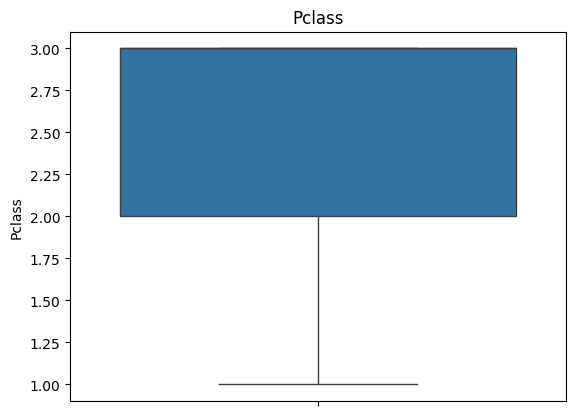

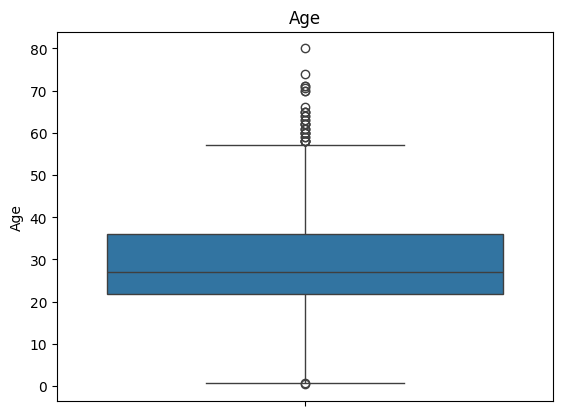

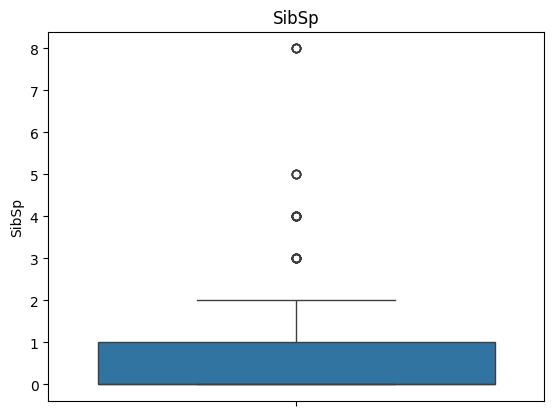

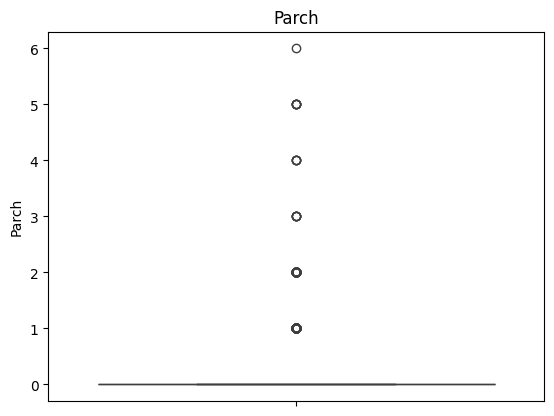

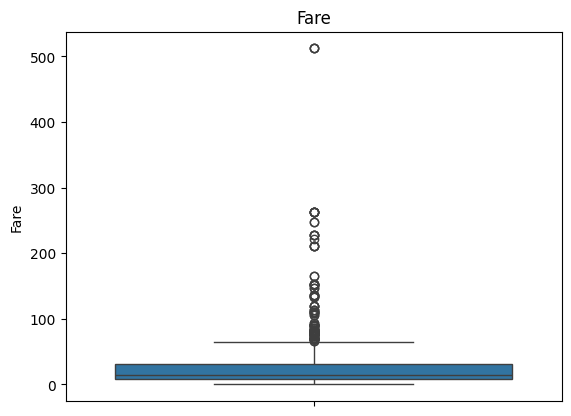

In [25]:
for feature in numeric_columns[1:]:
    # find outlier using boxplot
    sns.boxplot(y = copy_train_df[feature], data = copy_train_df)
    plt.title(feature)
    plt.show()

### Outlier Detection

In [26]:
# detect outliers in age column using interquartile range (IQR)
q1 = copy_train_df['Age'].quantile(0.25)
q3 = copy_train_df['Age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = copy_train_df[(copy_train_df['Age'] < lower_bound) | (copy_train_df['Age'] > upper_bound)]
print(outliers[['Age','Name']].head(20))

      Age                                              Name
11   58.0                          Bonnell, Miss. Elizabeth
33   66.0                             Wheadon, Mr. Edward H
54   65.0                    Ostby, Mr. Engelhart Cornelius
94   59.0                                 Coxon, Mr. Daniel
96   71.0                         Goldschmidt, Mr. George B
116  70.5                              Connors, Mr. Patrick
170  61.0                         Van der hoef, Mr. Wyckoff
195  58.0                              Lurette, Miss. Elise
232  59.0                         Sjostedt, Mr. Ernst Adolf
252  62.0                         Stead, Mr. William Thomas
268  58.0     Graham, Mrs. William Thompson (Edith Junkins)
275  63.0                 Andrews, Miss. Kornelia Theodosia
280  65.0                                  Duane, Mr. Frank
326  61.0                         Nysveen, Mr. Johan Hansen
366  60.0  Warren, Mrs. Frank Manley (Anna Sophia Atkinson)
438  64.0                               

In [27]:
age_outlier_percentage = (len(outliers) / len(copy_train_df)) * 100
print(age_outlier_percentage)

3.928170594837262


In [28]:
# detect outliers using Tukey's Fences
inner_lower_fence = q1 - 1.5 * iqr
inner_upper_fence = q3 + 1.5 * iqr

outer_lower_fence = q1 - 3 * iqr
outer_upper_fence = q3 + 3 * iqr

mild_outliers = copy_train_df[(copy_train_df['Age'] < inner_lower_fence) | (copy_train_df['Age'] > inner_upper_fence)]
extreme_outliers = copy_train_df[(copy_train_df['Age'] < outer_lower_fence) | (copy_train_df['Age'] > outer_upper_fence)]
print(mild_outliers['Age'].tail(10))
print(extreme_outliers['Age'].tail(10))

630    80.00
659    58.00
672    70.00
684    60.00
694    60.00
745    70.00
755     0.67
803     0.42
829    62.00
851    74.00
Name: Age, dtype: float64
630    80.0
Name: Age, dtype: float64


In [29]:
print(inner_lower_fence)
print(inner_upper_fence)
print(outer_lower_fence)
print(outer_upper_fence)

0.7439572040071454
57.15362567759571
-20.409668473588567
78.30725135519143


In [30]:
# detect outliers using Isolation Forest
# from sklearn.ensemble import IsolationForest
# iso = IsolationForest(contamination=0.1)
# copy_train_df['anomaly'] = iso.fit_predict(copy_train_df[['Age']])
# outliers = copy_train_df[copy_train_df['anomaly'] == -1]
# print(outliers['Age'])

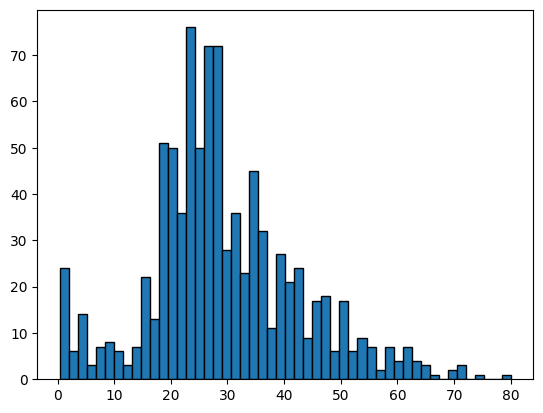

In [31]:
# find outlier using histogram
plt.hist(copy_train_df['Age'], bins = 50, edgecolor = 'black')
plt.show()

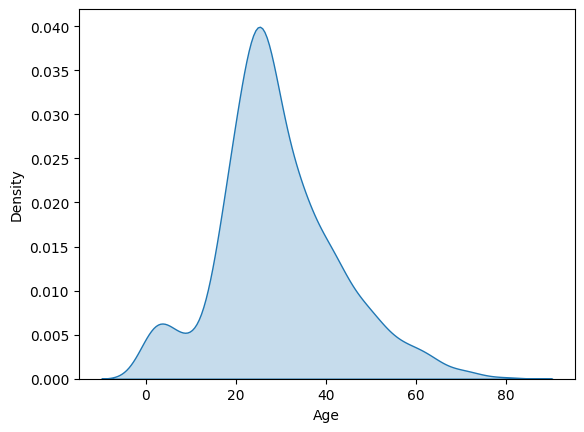

In [32]:
# find distribution of age using kde plot
sns.kdeplot(copy_train_df['Age'], fill = True)
plt.show()

In [33]:
for feature in numeric_columns[1:]:
    print(f"{feature} : {copy_train_df[feature].skew()}")

Pclass : -0.6305479068752845
Age : 0.4891990315061703
SibSp : 3.6953517271630565
Parch : 2.7491170471010933
Fare : 4.787316519674893


### Handle outliers using IQR and Decision Tree and Random Forest

In [34]:
# from sklearn.ensemble import RandomForestRegressor
# import pandas as pd

# # Assuming lower_bound and upper_bound are defined
# train_data = copy_train_df[copy_train_df['Age'].between(lower_bound, upper_bound)]
# test_data = copy_train_df[(copy_train_df['Age'] < lower_bound) | (copy_train_df['Age'] > upper_bound)]

# X_train = train_data[['Fare', 'Embarked', 'Pclass', 'Sex']]
# y_train = train_data['Age']
# X_test = test_data[['Fare', 'Embarked', 'Pclass', 'Sex']]

# X_train = pd.get_dummies(X_train, drop_first=True)
# X_test = pd.get_dummies(X_test, drop_first=True)

# # Align the columns of X_test to X_train
# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# random_regressor = RandomForestRegressor(random_state=42)
# random_regressor.fit(X_train, y_train)

# predicted_ages = random_regressor.predict(X_test)

# # Ensure outliers are defined correctly
# outliers = test_data.index  # or however you define your outliers
# copy_train_df.loc[outliers, 'Age'] = predicted_ages

In [35]:
remaining_outliers = copy_train_df[(copy_train_df['Age'] < lower_bound) | (copy_train_df['Age'] > upper_bound)]
print(remaining_outliers[['Age','Name']].tail(10))

       Age                                       Name
630  80.00       Barkworth, Mr. Algernon Henry Wilson
659  58.00                 Newell, Mr. Arthur Webster
672  70.00                Mitchell, Mr. Henry Michael
684  60.00          Brown, Mr. Thomas William Solomon
694  60.00                            Weir, Col. John
745  70.00               Crosby, Capt. Edward Gifford
755   0.67                  Hamalainen, Master. Viljo
803   0.42            Thomas, Master. Assad Alexander
829  62.00  Stone, Mrs. George Nelson (Martha Evelyn)
851  74.00                        Svensson, Mr. Johan


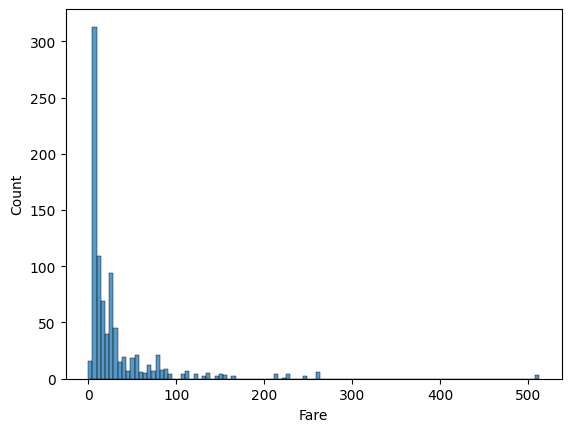

In [36]:
sns.histplot(copy_train_df['Fare'])
plt.show()

In [37]:
copy_train_df[copy_train_df['Parch'] == 6].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,E121,S


### Outliers and non outliers columns in numerical columns
1. Fare - is a financial data. so we can handle with log transformation
2. Parch
3. Sibsp
4. Age

#### Handle outliers in Fare column using LOG TRANSFORMATION

In [38]:
copy_train_df['Fare_log'] = np.log1p(copy_train_df['Fare'])

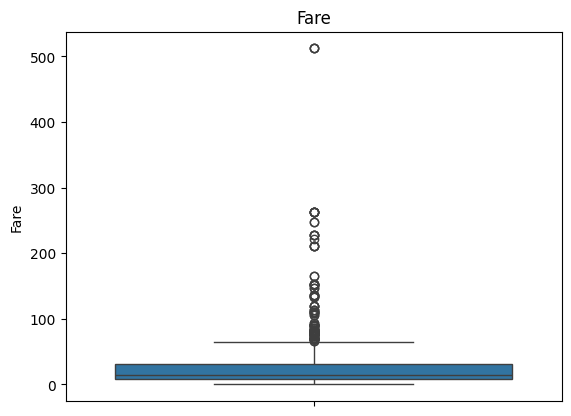

In [39]:
sns.boxplot(y = copy_train_df['Fare'], data = copy_train_df)
plt.title('Fare')
plt.show()

In [40]:
copy_train_df['Fare_log'].skew()

0.3949280095189306

Still some outliers are stayed in Fare column. So we can apply Robust Scaler

In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
copy_train_df['Fare_log_scaled'] = scaler.fit_transform(copy_train_df[['Fare_log']])


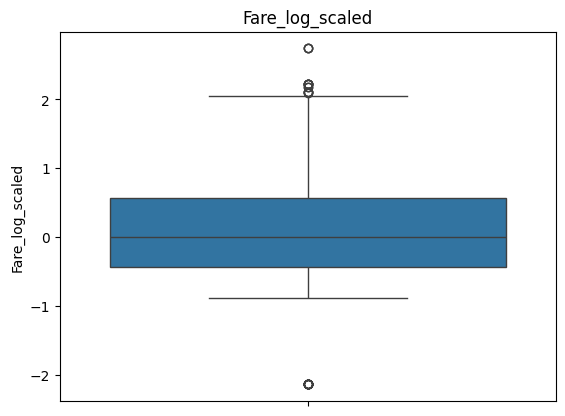

In [42]:
sns.boxplot(y = copy_train_df['Fare_log_scaled'], data = copy_train_df)
plt.title('Fare_log_scaled')
plt.show()

In [43]:
copy_train_df['Fare_log_scaled'].skew()

0.394928009518931

There is no impact in outlier, So we can choose Winsorization (capping extreme values)

In [44]:
lower_bound = copy_train_df['Fare_log'].quantile(0.01)
upper_bount = copy_train_df['Fare_log'].quantile(0.99)
copy_train_df['Fare_log_capped'] = np.clip(copy_train_df['Fare_log'], lower_bound, upper_bound)

In [45]:
copy_train_df['Fare_log_capped'].skew()

0.3949280095189306

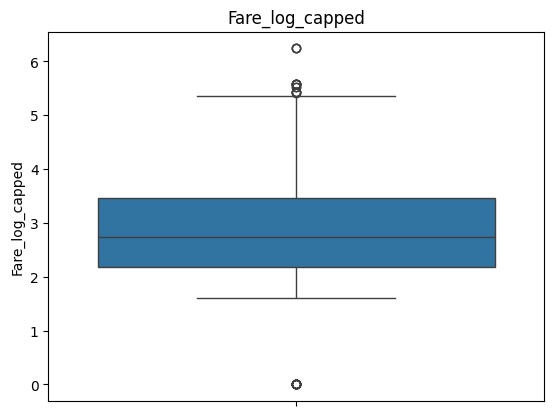

In [46]:
sns.boxplot(y = copy_train_df['Fare_log_capped'], data = copy_train_df)
plt.title('Fare_log_capped')
plt.show()

In [47]:
from scipy.stats.mstats import winsorize
copy_train_df['Fare_log_winsorize'] = winsorize(copy_train_df['Fare_log'], limits = [0.05, 0.05])

In [48]:
copy_train_df['Fare_log_winsorize'].skew()

0.7123144800284487

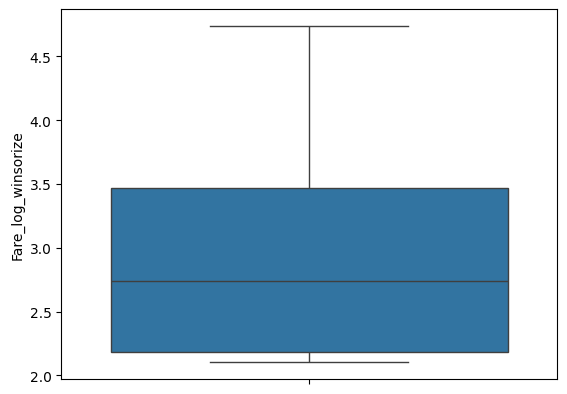

In [49]:
sns.boxplot(y = copy_train_df['Fare_log_winsorize'], data = copy_train_df)
plt.show()

All outliers are handles in the Fare column. The next column is Parch

### Handle outliers in Parch Column Using LOG TRANSFORMATION

In [50]:
copy_train_df['Parch_log'] = np.log1p(copy_train_df['Parch'])

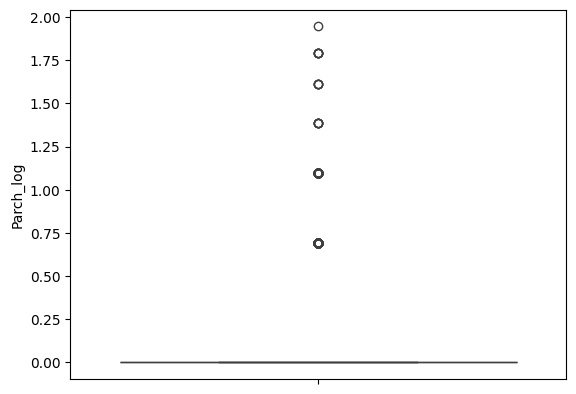

In [51]:
sns.boxplot(y = copy_train_df['Parch_log'], data = copy_train_df)
plt.show()

There is no changes. So apply winsorization

In [52]:
from scipy.stats.mstats import winsorize
copy_train_df['Parch_log_winsorize'] = winsorize(copy_train_df['Parch_log'], limits = [0.05, 0.25])

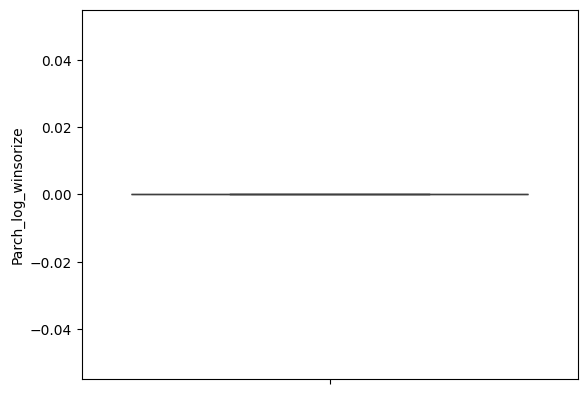

In [53]:
sns.boxplot(y = copy_train_df['Parch_log_winsorize'], data = copy_train_df)
plt.show()

Outliers are handled in Parch column using Winsorization

### Handle outliers in Sibsp column

In [54]:
copy_train_df['SibSp_log'] = np.log1p(copy_train_df['SibSp'])

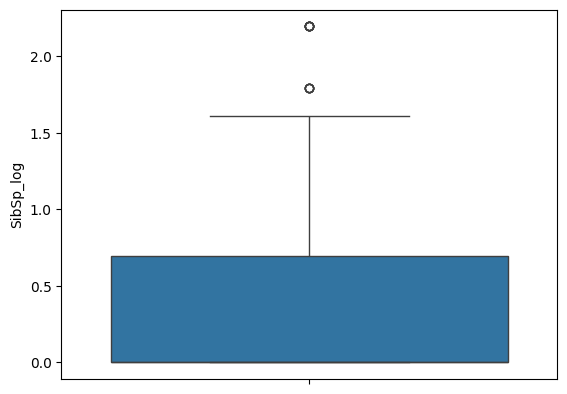

In [55]:
sns.boxplot(y = copy_train_df['SibSp_log'], data = copy_train_df)
plt.show()

In [56]:
from scipy.stats.mstats import winsorize
copy_train_df['SibSp_winsorize'] = winsorize(copy_train_df['SibSp_log'], limits = [0,0.05])

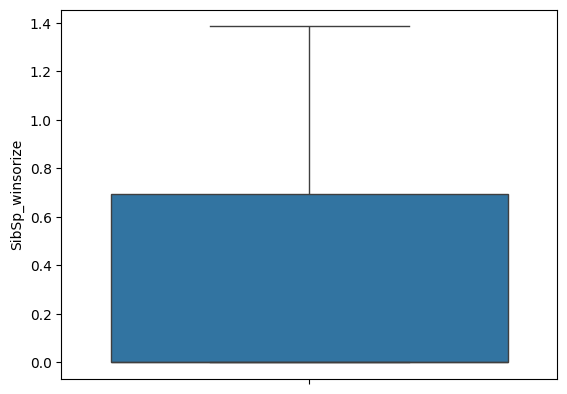

In [57]:
sns.boxplot(y = copy_train_df['SibSp_winsorize'], data = copy_train_df)
plt.show()

Outliers handled in sibsp column

### handling outliers in age column using capping method

In [58]:
copy_train_df['Age'] = copy_train_df['Age'].apply(lambda x: min(x, 57) if x > 57 else max(x, 1))

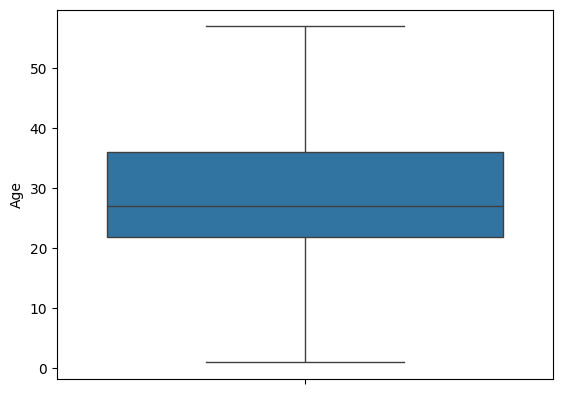

In [59]:
sns.boxplot(y = copy_train_df['Age'], data = copy_train_df)
plt.show()

In [60]:
copy_train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Fare_log_scaled,Fare_log_capped,Fare_log_winsorize,Parch_log,Parch_log_winsorize,SibSp_log,SibSp_winsorize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F G73,S,2.110213,-0.490934,2.110213,2.110213,0.0,0.0,0.693147,0.693147
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,1.206641,4.280593,4.280593,0.0,0.0,0.693147,0.693147


### Feature Engineering

Create family size column

In [61]:
copy_train_df['FamilySize'] = copy_train_df['SibSp'] + copy_train_df['Parch']

In [62]:
copy_train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Fare_log_scaled,Fare_log_capped,Fare_log_winsorize,Parch_log,Parch_log_winsorize,SibSp_log,SibSp_winsorize,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F G73,S,2.110213,-0.490934,2.110213,2.110213,0.0,0.0,0.693147,0.693147,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,1.206641,4.280593,4.280593,0.0,0.0,0.693147,0.693147,1


Create a new column Fare per person

In [63]:
copy_train_df['FarePerPerson'] = copy_train_df['Fare'] / (copy_train_df['FamilySize'] + 1)

Create a new column IsAlone

In [64]:
copy_train_df['IsAlone'] = (copy_train_df['FamilySize'] == 0).astype(int)

Title extraction from name

In [65]:
copy_train_df['Title'] = copy_train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand = False)

In [66]:
copy_train_df['Title'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

create age group

In [67]:
copy_train_df['AgeGroup'] = pd.cut(copy_train_df['Age'], bins = [0,12,18,60,100], labels = ['Child', 'Teen', 'Adult', 'Senior'])

Create deck column from cabin

In [68]:
copy_train_df['Deck'] = copy_train_df['Cabin'].str[0]

Fare binning

In [69]:
copy_train_df['FareGroup'] = pd.qcut(copy_train_df['Fare'], 4, labels = ['Low', 'Medium', 'High', 'Very High'])

Tiket Frequency

In [70]:
tickets_count = copy_train_df['Ticket'].value_counts()
copy_train_df['TickerFrequency'] = copy_train_df['Ticket'].map(tickets_count)

PClass and Age intraction

In [71]:
copy_train_df['Pclass_Age'] = copy_train_df['Pclass'] * copy_train_df['Age']

Embarked and Pclass Interaction

In [72]:
copy_train_df['Embarked_Pclass'] = copy_train_df['Embarked'].astype(str) + '_' + copy_train_df['Pclass'].astype(str)

Survival Probability by Group

In [73]:
title_survival_rate = copy_train_df.groupby('Title')['Survived'].mean()
copy_train_df['Title_Survival_Rate'] = copy_train_df['Title'].map(title_survival_rate)

Family Survival Rate

In [74]:
copy_train_df['LastName'] = copy_train_df['Name'].apply(lambda x: x.split('.')[0])
family_survival_rate = copy_train_df.groupby('LastName')['Survived'].transform('mean')
copy_train_df['FamilySurvivalRate'] = family_survival_rate

In [75]:
copy_train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Fare_log', 'Fare_log_scaled',
       'Fare_log_capped', 'Fare_log_winsorize', 'Parch_log',
       'Parch_log_winsorize', 'SibSp_log', 'SibSp_winsorize', 'FamilySize',
       'FarePerPerson', 'IsAlone', 'Title', 'AgeGroup', 'Deck', 'FareGroup',
       'TickerFrequency', 'Pclass_Age', 'Embarked_Pclass',
       'Title_Survival_Rate', 'LastName', 'FamilySurvivalRate'],
      dtype='object')

In [76]:
lst = ['FamilySize',
       'FarePerPerson', 'IsAlone', 'Title', 'AgeGroup', 'Deck', 'FareGroup',
       'TickerFrequency', 'Pclass_Age', 'Embarked_Pclass',
       'Title_Survival_Rate', 'LastName', 'FamilySurvivalRate']
for i in lst:
    print(f"{i}: {copy_train_df[i].dtype}")

FamilySize: int64
FarePerPerson: float64
IsAlone: int32
Title: object
AgeGroup: category
Deck: object
FareGroup: category
TickerFrequency: int64
Pclass_Age: float64
Embarked_Pclass: object
Title_Survival_Rate: float64
LastName: object
FamilySurvivalRate: float64


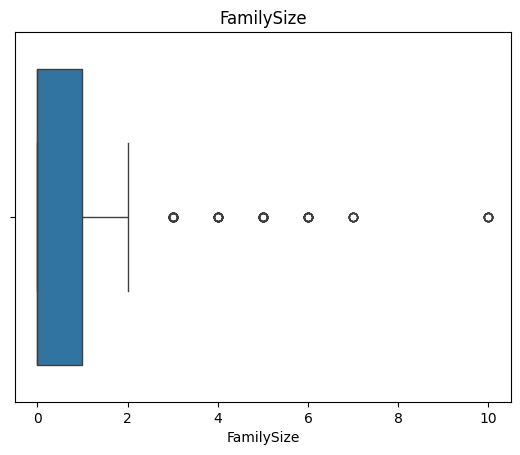

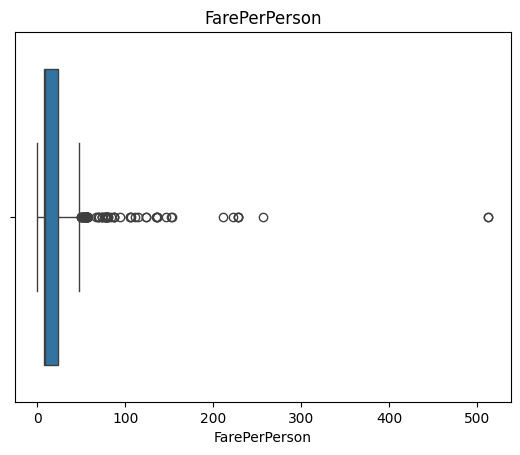

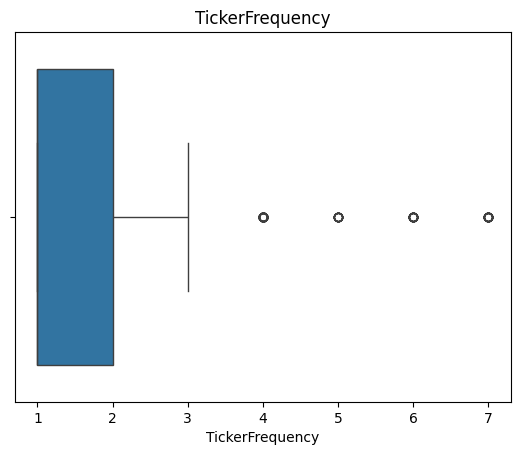

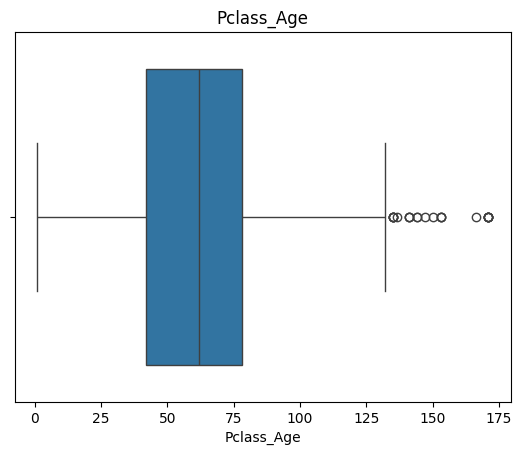

In [77]:
lst = ['FamilySize','FarePerPerson', 'TickerFrequency', 'Pclass_Age']

for i in lst:
    sns.boxplot(x = copy_train_df[i], data = copy_train_df)
    plt.title(i)
    plt.show()

In [78]:
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'LastName', 
                   'Fare', 'Fare_log', 'Fare_log_scaled', 
                   'Fare_log_capped', 'Parch', 'SibSp']
copy_train_df = copy_train_df.drop(columns = columns_to_drop)

In [79]:
columns_to_drop = ['Parch_log', 'Parch_log_winsorize', 'SibSp_log', 'SibSp_winsorize']
copy_train_df = copy_train_df.drop(columns=columns_to_drop)

In [80]:
copy_train_df.head(1)

,Survived,Pclass,Sex,Age,Embarked,Fare_log_winsorize,FamilySize,FarePerPerson,IsAlone,Title,AgeGroup,Deck,FareGroup,TickerFrequency,Pclass_Age,Embarked_Pclass,Title_Survival_Rate,FamilySurvivalRate
0,0,3,male,22.0,S,2.110213,1,3.625,0,Mr,Adult,F,Low,1,66.0,S_3,0.156673,0.0


In [81]:
# sns.boxplot(x = copy_train_df['FamilySize_win'], data = copy_train_df)
# plt.title('FamilySize')
# plt.show()

Handle the outliers in FarePerPerson column

In [82]:
from scipy.stats.mstats import winsorize
copy_train_df['FarePerPerson'] = np.log1p(copy_train_df['FarePerPerson'])
copy_train_df['FarePerPerson'] = winsorize(copy_train_df['FarePerPerson'], limits = [0.02,0.02])

Handle outliers in TicketFrequency column

In [83]:
copy_train_df['TickerFrequency'] = winsorize(copy_train_df['TickerFrequency'], limits=[0,0.13])

Handle outliers in Pclass_Age column

In [84]:
copy_train_df['Pclass_Age'] = winsorize(copy_train_df['Pclass_Age'], (0, 0.03))

Handle outliers in FamilySize column

In [85]:
copy_train_df['FamilySize'] = winsorize(copy_train_df['FamilySize'], limits = [0,0.11])

In [86]:
# copy_train_df.drop(columns = ['FamilySize_win'], inplace = True)

Handle outliers in Title column

In [87]:
title_count = copy_train_df['Title'].value_counts()
print(title_count)

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [88]:
rare_title = ['Jonkheer','Countess','Capt','Sir','Lady','Don','Mme','Ms','Major','Mlle','Col','Rev','Dr']
copy_train_df['Title'] = copy_train_df['Title'].replace(rare_title, 'Rare')
copy_train_df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

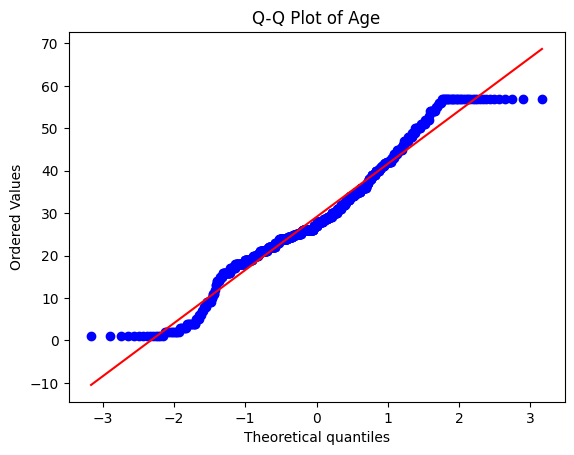

In [89]:
import scipy.stats as stats

stats.probplot(copy_train_df['Age'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Age")
plt.show()

In [90]:
from scipy.stats import shapiro

stat, p_value = shapiro(copy_train_df['Age'])
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk Test: Statistic=0.9722079216283899, p-value=5.252233029692784e-12


The age column is not normally distributed. So we choose Normalization instead of Standardization.


Normalization - Non Normal Distribution


Standardization - Normal Distribution

In [91]:
copy_train_df.head()

,Survived,Pclass,Sex,Age,Embarked,Fare_log_winsorize,FamilySize,FarePerPerson,IsAlone,Title,AgeGroup,Deck,FareGroup,TickerFrequency,Pclass_Age,Embarked_Pclass,Title_Survival_Rate,FamilySurvivalRate
0,0,3,male,22.0,S,2.110213,1,1.531476,0,Mr,Adult,F,Low,1,66.0,S_3,0.156673,0.0
1,1,1,female,38.0,C,4.280593,1,3.601186,0,Mrs,Adult,C,Very High,1,38.0,C_1,0.792000,1.0
2,1,3,female,26.0,S,2.188856,0,2.188856,1,Miss,Adult,E,Medium,1,78.0,S_3,0.697802,1.0
3,1,1,female,35.0,S,3.990834,1,3.316003,0,Mrs,Adult,C,Very High,2,35.0,S_1,0.792000,1.0
4,0,3,male,35.0,S,2.202765,0,2.202765,1,Mr,Adult,E,Medium,1,105.0,S_3,0.156673,0.0


In [92]:
from scipy.stats import shapiro
lst = ['Pclass', 'Age', 'Fare_log_winsorize', 'FamilySize', 'FarePerPerson', 'IsAlone','TickerFrequency','Pclass_Age',
       'Title_Survival_Rate','FamilySurvivalRate']
for i in lst:
    stat, p_value = shapiro(copy_train_df[i])
    print(f'Shapiro-Wilk Test for {i}: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk Test for Pclass: Statistic=0.7183302542767394, p-value=3.393031278882668e-36
Shapiro-Wilk Test for Age: Statistic=0.9722079216283899, p-value=5.252233029692784e-12
Shapiro-Wilk Test for Fare_log_winsorize: Statistic=0.872057218231752, p-value=2.2216215837332602e-26
Shapiro-Wilk Test for FamilySize: Statistic=0.6880060775188448, p-value=1.3782506517827886e-37
Shapiro-Wilk Test for FarePerPerson: Statistic=0.8955843304171648, p-value=4.077254216430604e-24
Shapiro-Wilk Test for IsAlone: Statistic=0.6210636191524769, p-value=2.622941037095278e-40
Shapiro-Wilk Test for TickerFrequency: Statistic=0.6875602112006607, p-value=1.3173551240558977e-37
Shapiro-Wilk Test for Pclass_Age: Statistic=0.9845658717735765, p-value=4.40345854840292e-08
Shapiro-Wilk Test for Title_Survival_Rate: Statistic=0.713146139754539, p-value=1.9250570633317494e-36
Shapiro-Wilk Test for FamilySurvivalRate: Statistic=0.6337069668631377, p-value=7.959174137240246e-40


the PValues are <= 0.05, so we can reject the null hypothesis. (the columns are not normally distributed)

Normalization

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['Pclass', 'Age', 'Fare_log_winsorize', 'FamilySize', 'FarePerPerson', 'IsAlone','TickerFrequency','Pclass_Age',
       'Title_Survival_Rate','FamilySurvivalRate']
copy_train_df[columns_to_normalize] = scaler.fit_transform(copy_train_df[columns_to_normalize])

In [94]:
cat = list(copy_train_df.select_dtypes('object').columns)
cat

['Sex', 'Embarked', 'Title', 'Deck', 'Embarked_Pclass']

### Handling Categorical Features

Column Name: SEX

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
copy_train_df['Sex'] = le.fit_transform(copy_train_df['Sex'])

Column Name: EMBARKED, TITLE, DECK, EMBARKED_PCLASS

In [96]:
copy_train_df = pd.get_dummies(copy_train_df, columns = ['AgeGroup','FareGroup','Embarked','Title','Deck','Embarked_Pclass'], drop_first=True)

save the dataframe into csv

In [97]:
copy_train_df.to_csv('dataset/final_df.csv', index = False)